In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [01:10<00:00, 43.1MB/s]
100% 2.70G/2.70G [01:10<00:00, 41.0MB/s]


In [ ]:
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Project Code

In [ ]:
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Data Loading

In [ ]:

train_gen = image_dataset_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


# Data Engineering
Since the data is already augmented, there is no requirement of data engineering. Feature scaling is automatically done by image generators

# Modelling

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                   

In [ ]:
ep = 1
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

2197/2197 [==============================] - 399s 174ms/step - loss: 1.5628 - accuracy: 0.5430 - val_loss: 0.5419 - val_accuracy: 0.8325


In [ ]:
model.save("plant_disease.h5")

In [ ]:
#Save Model To GDrive
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/SavedModels/plant_disease.h5')

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/plant_disease.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="/content/model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load the image
image = Image.open("/content/test/test/AppleCedarRust1.JPG").convert("RGB")
image = image.resize((input_details[0]['shape'][1], input_details[0]['shape'][2]))

# Prepare input data
input_data = np.expand_dims(image, axis=0)
input_data = input_data.astype(np.float32)

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Process the output
prediction = np.argmax(output_data[0])

In [ ]:
prediction

4

# Metrics

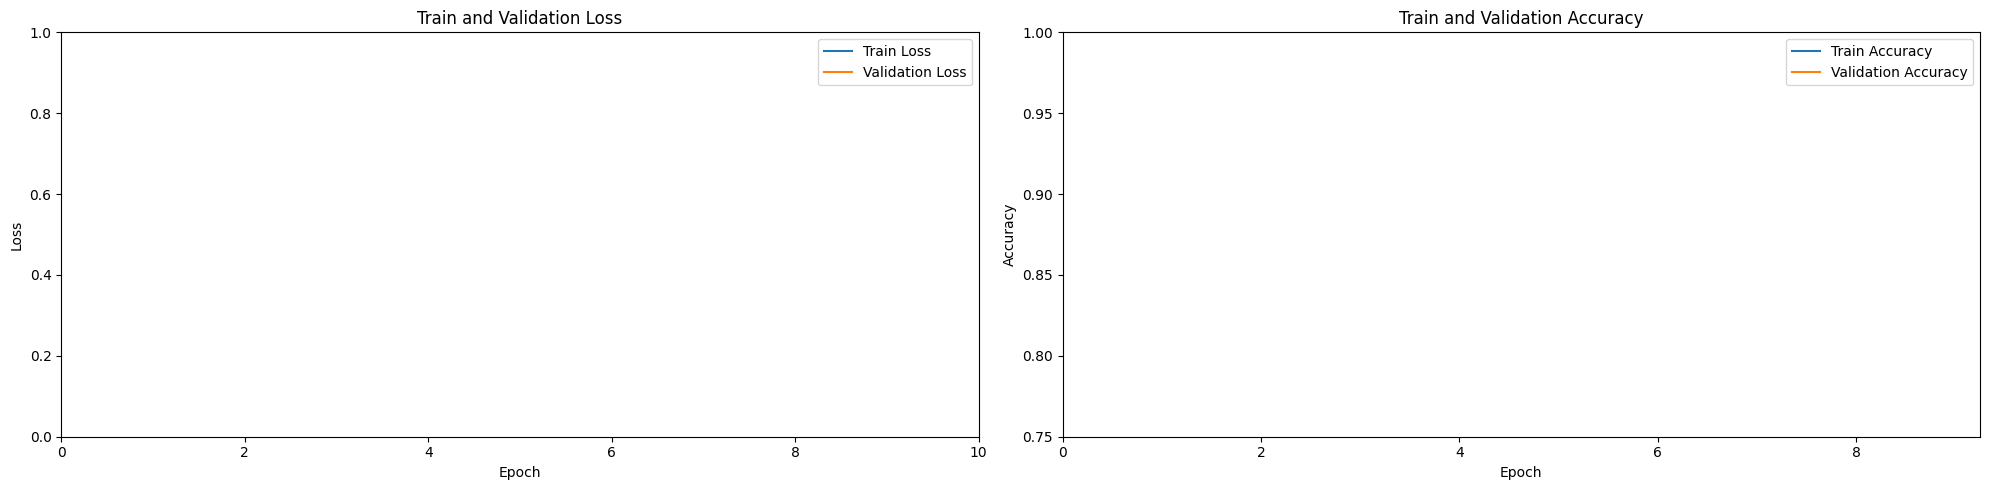

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

1/1 [==============================] - 0s 131ms/step


In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 54.30 %
Test Accuracy   : 83.25 %
Precision Score : 83.25 %
Recall Score    : 83.25 %


# Confusion Matrix

<Figure size 2000x500 with 0 Axes>

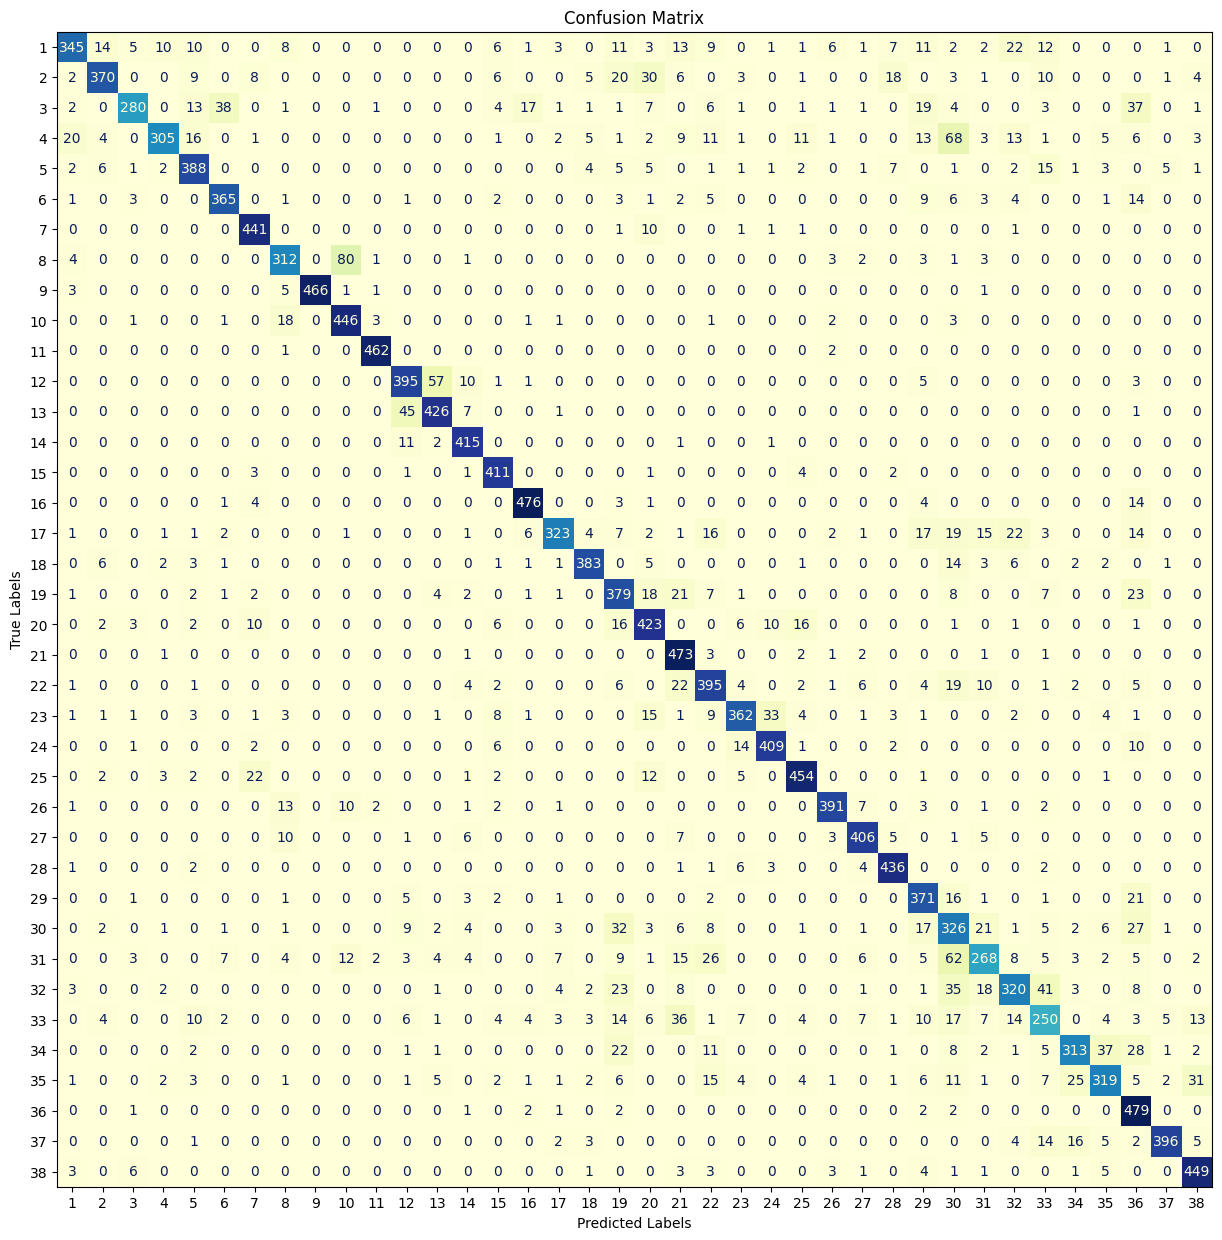

In [ ]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

1/1 [==============================] - 0s 19ms/step
The leaf is of Tomato and its condition is  Late Blight


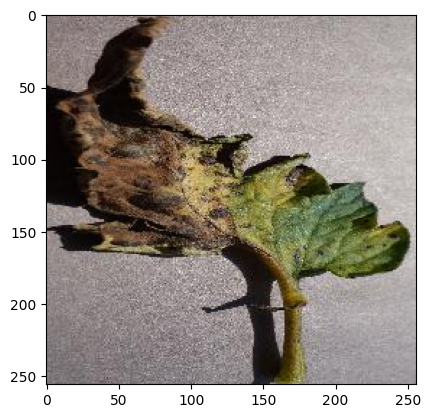

In [ ]:
# Set the path to the directory containing the dataset & load the Image
dataset_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
img_path = '/content/test/test/TomatoEarlyBlight1.JPG'
img = image.load_img(img_path, target_size=(256, 256))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

# Use the model to predict the class label
pred = model.predict(img_array)
class_label = np.argmax(pred)

# Get a list of all items (files and folders) in the dataset directory
items = os.listdir(dataset_path)

# Filter out only the folder names
folder_names = [item for item in items if os.path.isdir(os.path.join(dataset_path, item))]

# Sort the folder names alphabetically
folder_names.sort()

# Create a dictionary to map class labels to folder names
class_labels_mapping = {}

# Assign class labels to folder names
for index, folder_name in enumerate(folder_names):
    class_labels_mapping[index] = folder_name

# Use the model to predict the class label
pred = model.predict(img_array)
class_label = np.argmax(pred)
class_name = class_labels_mapping[class_label]

leaf_parts = class_name.split('_')
leaf_name = leaf_parts[0].title()

condition_parts = class_name.split('__')
condition = condition_parts[-1].replace('_', ' ').title()

output = f"The leaf is of {leaf_name} and its condition is {condition}"
print(output)

# Display the image

img = image.load_img(img_path, target_size=(256, 256))
plt.imshow(img)
plt.axis('on')
plt.show()

# Gradio Implementation

In [ ]:
import gradio as gr
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Set the path to the directory containing the dataset & load the Image
dataset_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

# Placeholder for loading your model
# Replace this with your actual model loading code
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/SavedModels/plant_disease.h5")

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.
    return img, img_array

def map_class_label_to_name(class_label, folder_names):
    class_labels_mapping = {index: folder_name for index, folder_name in enumerate(folder_names)}
    class_name = class_labels_mapping.get(class_label, "Unknown")
    return class_name

def predict_disease(img_file):
    try:
        # Load and preprocess the image
        img = Image.open(img_file)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.

        # Use the model to predict the class label
        pred = model.predict(img_array)
        class_label = np.argmax(pred)

        # Get a list of folder names in the dataset
        items = os.listdir(dataset_path)
        folder_names = [item for item in items if os.path.isdir(os.path.join(dataset_path, item))]
        folder_names.sort()

        # Map class label to class name
        class_name = map_class_label_to_name(class_label, folder_names)

        leaf_parts = class_name.split('_')
        leaf_name = leaf_parts[0].title()

        condition_parts = class_name.split('__')
        condition = condition_parts[-1].replace('_', ' ').title()

        output = f"The leaf is of {leaf_name} and its condition is {condition}"

        # Display the selected image and prediction output using Gradio's Interface
        return img_file, output

    except Exception as e:
        return f"Error: {str(e)}"

iface = gr.Interface(fn=predict_disease, inputs="file", outputs=["image", "text"], live=True)
iface.launch()


# Flask App And Website Implementation

In [ ]:
!ngrok authtoken #replace this comment with your own authtoken

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install flask_ngrok

In [ ]:
!pip install pyngrok

In [ ]:
from flask import Flask, render_template, request, jsonify
from flask_ngrok import run_with_ngrok
from keras.preprocessing import image
import numpy as np
import os
from io import BytesIO

# Import your model and other necessary functions/classes
# Replace 'model' with the actual name of your model and adjust imports accordingly
model = tf.keras.models.load_model('/content/drive/MyDrive/SavedModels/plant_disease.h5')

app = Flask(__name__,)
run_with_ngrok(app)  # Start ngrok when the app is run

# Set the path to the directory containing the dataset
dataset_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

# Get a list of all items (files and folders) in the dataset directory
items = os.listdir(dataset_path)

# Filter out only the folder names
folder_names = [item for item in items if os.path.isdir(os.path.join(dataset_path, item))]

# Sort the folder names alphabetically
folder_names.sort()

# Create a dictionary to map class labels to folder names
class_labels_mapping = {}

# Assign class labels to folder names
for index, folder_name in enumerate(folder_names):
    class_labels_mapping[index] = folder_name

# Route for the main page
@app.route('/')
def index():
    return render_template('Home.html')

@app.route('/plant-disease-detector')
def plant_disease_detector():
    return render_template('Plant-Disease-Detector.html')

# Route for plant disease detection
@app.route('/detect_disease', methods=['POST'])
def detect_disease_route():
    try:
        # Assuming you receive an image file in the request
        image_file = request.files['image']

        # Read the contents of the file
        img_contents = image_file.read()

        # Load and preprocess the image
        img = image.load_img(BytesIO(img_contents), target_size=(256, 256))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.

        # Use the model to predict the class label
        pred = model.predict(img_array)
        class_label = np.argmax(pred)
        class_name = class_labels_mapping[class_label]

        leaf_parts = class_name.split('_')
        leaf_name = leaf_parts[0].title()

        condition_parts = class_name.split('__')
        condition = condition_parts[-1].replace('_', ' ').title()

        output = f"The leaf is of {leaf_name} and its condition is {condition}"

        # Print for debugging
        print("Prediction:", output)

        # Return the result as JSON
        return jsonify({'result': output})

    except Exception as e:
        print(f"Exception: {e}")
        return jsonify({'error': 'Internal Server Error'}), 500

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://9fe2-34-91-90-105.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [10/May/2024 15:16:11] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/May/2024 15:16:12] "GET /static/nicepage.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/May/2024 15:16:12] "GET /static/images/download-PhotoRoom.png-PhotoRoom.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/May/2024 15:16:12] "GET /static/Home.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/May/2024 15:16:12] "GET /static/images/strawberry.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/May/2024 15:16:12] "GET /static/images/pepper.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/May/2024 15:16:12] "GET /static/nicepage.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/May/2024 15:16:12] "GET /static/images/SSUET_Logo.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/May/2024 15:16:12] "GET /static/images/corn.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/May/2024 15:16:12] "GET /static/jquery.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/May/2024

In [ ]:
from pyngrok import ngrok

# Set up the ngrok tunnel
public_url = ngrok.connect(5000)

print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}/\"".format(public_url, 5000))

 * ngrok tunnel "NgrokTunnel: "https://9fe2-34-91-90-105.ngrok-free.app" -> "http://localhost:5000"" -> "http://127.0.0.1:5000/"
